In [1]:
# Set up environment variables
# IMPORTANT: Set these in your .env file or system environment variables before running
# Copy .env.example to .env and fill in your actual API keys
%env OPENROUTER_API_KEY=your_openrouter_api_key_here
%env FIRECRAWL_API_KEY=your_firecrawl_api_key_here


env: OPENROUTER_API_KEY=your_openrouter_api_key_here
env: FIRECRAWL_API_KEY=your_firecrawl_api_key_here


In [2]:
# Import required libraries
import sys
import os
from datetime import datetime
from IPython.display import display, Markdown, HTML
import time

# Import our deep research graph
from deep_research_graph import DeepResearchWorkflow, DeepResearchState

print("✅ Deep Research LangGraph System Loaded!")
print(f"📅 Current time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 60)


✅ Deep Research LangGraph System Loaded!
📅 Current time: 2025-07-11 10:39:12


## 1. Initialize the Deep Research Workflow

Let's create our workflow instance and configure it for research.


In [3]:
# Initialize the workflow
workflow = DeepResearchWorkflow(max_steps=3)  # Limit to 3 steps for demo

print("🏗️ Deep Research Workflow initialized!")
print(f"📊 Configuration:")
print(f"  • Maximum steps: {workflow.max_steps}")
print(f"  • Graph compiled: ✅")

# Let's also examine the graph structure
graph_info = workflow.workflow.get_graph()
print(f"\n📋 Graph Structure:")
print(f"  • Nodes: {list(graph_info.nodes.keys())}")
print(f"  • Entry point: START → initial_planning")
print(f"  • Includes LLM summarization: ✅")
print(f"  • Contains conditional routing: ✅")


🏗️ Deep Research Workflow initialized!
📊 Configuration:
  • Maximum steps: 3
  • Graph compiled: ✅

📋 Graph Structure:
  • Nodes: ['__start__', 'initial_planning', 'step_execution', 'replanning', 'summarize', '__end__']
  • Entry point: START → initial_planning
  • Includes LLM summarization: ✅
  • Contains conditional routing: ✅


## 2. Visualize the Workflow Graph

Let's create a visual representation of our research workflow.


📊 Workflow Graph Visualization:


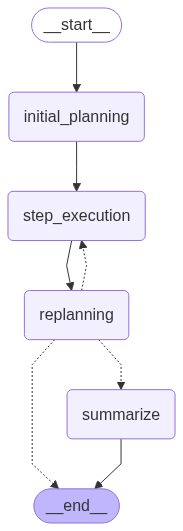

In [4]:
try:
    # Try to visualize the graph
    from IPython.display import Image, display
    
    # Get the graph visualization
    png_bytes = workflow.workflow.get_graph().draw_mermaid_png()
    
    # Save and display
    with open("deep_research_workflow.png", "wb") as f:
        f.write(png_bytes)
    
    print("📊 Workflow Graph Visualization:")
    display(Image("deep_research_workflow.png"))
    
except Exception as e:
    print(f"⚠️ Could not generate graph visualization: {e}")
    print("📋 Workflow structure (text):")
    print("""
    START 
      ↓
    initial_planning 
      ↓
    step_execution 
      ↓
    replanning → [decision point]
      ↓ (if more steps)     ↓ (if complete)      ↓ (if max steps)
    step_execution         summarize          finalize_response
      ↑ (loop back)           ↓                      ↓
                             END                    END
    """)


## 5. Advanced Demo: Custom Streaming with Event Analysis

Let's create a more detailed streaming demo that analyzes each event in the workflow.


In [5]:
def detailed_streaming_demo(objective: str, max_steps: int = 3):
    """Run a detailed streaming demo with event analysis"""
    
    print("🚀 DETAILED STREAMING ANALYSIS")
    print("=" * 80)
    print(f"🎯 Objective: {objective}")
    print(f"📊 Max Steps: {max_steps}")
    print("=" * 80)
    
    # Create initial state
    initial_state = DeepResearchState(
        objective=objective,
        max_steps=max_steps
    )
    
    # Track events
    events_log = []
    step_counter = 0
    
    print("\n📡 STREAMING EVENTS:")
    print("-" * 40)
    final_result = None

    events_log.append({
            'timestamp': datetime.now(),
            'node': 'initial_state',
            'output': initial_state
        })
    
    # Stream and analyze each event
    for event in workflow.workflow.stream(initial_state):
        node_name = list(event.keys())[0]
        node_output = event[node_name]
        
        # Log event
        events_log.append({
            'timestamp': datetime.now(),
            'node': node_name,
            'output': node_output
        })
        
        # Analyze the event
        print(f"\n📍 Event #{len(events_log)}: {node_name.upper()}")
        
        if isinstance(node_output, dict):
            # Analyze specific fields
            if "current_plan" in node_output and node_output["current_plan"]:
                plan = node_output["current_plan"]
                if hasattr(plan, 'steps'):
                    print(f"   📋 Plan updated: {len(plan.steps)} steps")
                    for i, step in enumerate(plan.steps[:2], 1):  # Show first 2 steps
                        print(f"      {i}. {step}")
            
            if "step_count" in node_output:
                print(f"   📈 Steps completed: {node_output['step_count']}")
            
            if "current_step" in node_output and node_output["current_step"]:
                step = node_output["current_step"]
                print(f"   🔍 Current step: {step}")
            
            if "step_result" in node_output and node_output["step_result"]:
                result_len = len(str(node_output["step_result"]))
                print(f"   ✅ Step result: {result_len} characters retrieved")
            
            if "is_complete" in node_output and node_output["is_complete"]:
                print(f"   🏁 Workflow complete: {node_output['is_complete']}")
            
            if "ready_to_summarize" in node_output and node_output["ready_to_summarize"]:
                print(f"   📝 Ready for summarization: {node_output['ready_to_summarize']}")
            
            if "initial_response" in node_output and node_output["initial_response"]:
                response_len = len(node_output["initial_response"])
                print(f"   📋 Initial response: {response_len} characters (pre-summarization)")
            
            if "final_answer" in node_output and node_output["final_answer"]:
                answer_len = len(node_output["final_answer"])
                final_result = node_output["final_answer"]
                print(f"   📄 Final answer: {answer_len} characters")
        
        print(f"   ⏱️  {datetime.now().strftime('%H:%M:%S')}")
    events_log.append({
        'timestamp': datetime.now(),
        'node': 'final_result',
        'output': final_result
    })
        
    
    print("\n" + "=" * 80)
    print("🎊 STREAMING ANALYSIS COMPLETE")
    
    print(f"📊 Total events processed: {len(events_log)}")
 
    return final_result, events_log

In [6]:
# # Run the detailed demo
advanced_objective = "Who is the current mayor of the city with the oldest Chinatown in America? Also find their birthday"
final_result, events = detailed_streaming_demo(advanced_objective, max_steps=10)


🚀 DETAILED STREAMING ANALYSIS
🎯 Objective: Who is the current mayor of the city with the oldest Chinatown in America? Also find their birthday
📊 Max Steps: 10

📡 STREAMING EVENTS:
----------------------------------------



📍 Event #2: INITIAL_PLANNING
   📋 Plan updated: 3 steps
      1. Identify which city in America has the oldest Chinatown.
      2. Confirm the current mayor of that city using official or reputable sources.
   ⏱️  10:39:14
🔍 Looking up "oldest Chinatown in America"

📍 Event #3: STEP_EXECUTION
   📈 Steps completed: 1
   🔍 Current step: Identify which city in America has the oldest Chinatown.
   ✅ Step result: 1190 characters retrieved
   ⏱️  10:39:20

📍 Event #4: REPLANNING
   📋 Plan updated: 2 steps
      1. Confirm the current mayor of San Francisco using official or reputable sources.
      2. Find the mayor's date of birth from reliable sources.
   ⏱️  10:39:21
🔍 Looking up "current mayor of San Francisco"
🔥 Scraping https://www.sf.gov/departments--office-mayor|markdown
🔥 Scraping https://www.sf.gov/mayor|markdown
🔍 Looking up "current mayor of San Francisco site:en.wikipedia.org"
🔥 Scraping https://en.wikipedia.org/wiki/Daniel_Lurie|markdown
🔥 Scraping https://en.wikipedia.org/wik

In [7]:
print("Final Result:")
print("=" * 60)
print(final_result)


Final Result:
Okay, here is the comprehensive final response based on the research steps completed:

---

**Final Research Report: Mayor of the City with the Oldest Chinatown in America**

**Introduction**

This report addresses the original research objective: identifying the current mayor of the city in America possessing the oldest Chinatown and determining the mayor's date of birth. The research process involved identifying the oldest Chinatown, confirming the current mayor of that city, and verifying the mayor's birthdate using reliable sources.

**Research Findings**

1.  **Oldest Chinatown in America:**
    *  


📊 WORKFLOW PERFORMANCE ANALYSIS
📈 Event Statistics:
   Total events: 8
   initial_state: 1 events (12.5%)
   initial_planning: 1 events (12.5%)
   step_execution: 2 events (25.0%)
   replanning: 2 events (25.0%)
   summarize: 1 events (12.5%)
   final_result: 1 events (12.5%)

⏱️  Timing Analysis:
   Total workflow time: 31.21 seconds
   Average time per event: 3.90 seconds

🔍 Research Quality Metrics:
   Research steps completed: 0
   Information sources used: 0
   Final answer length: 611 characters


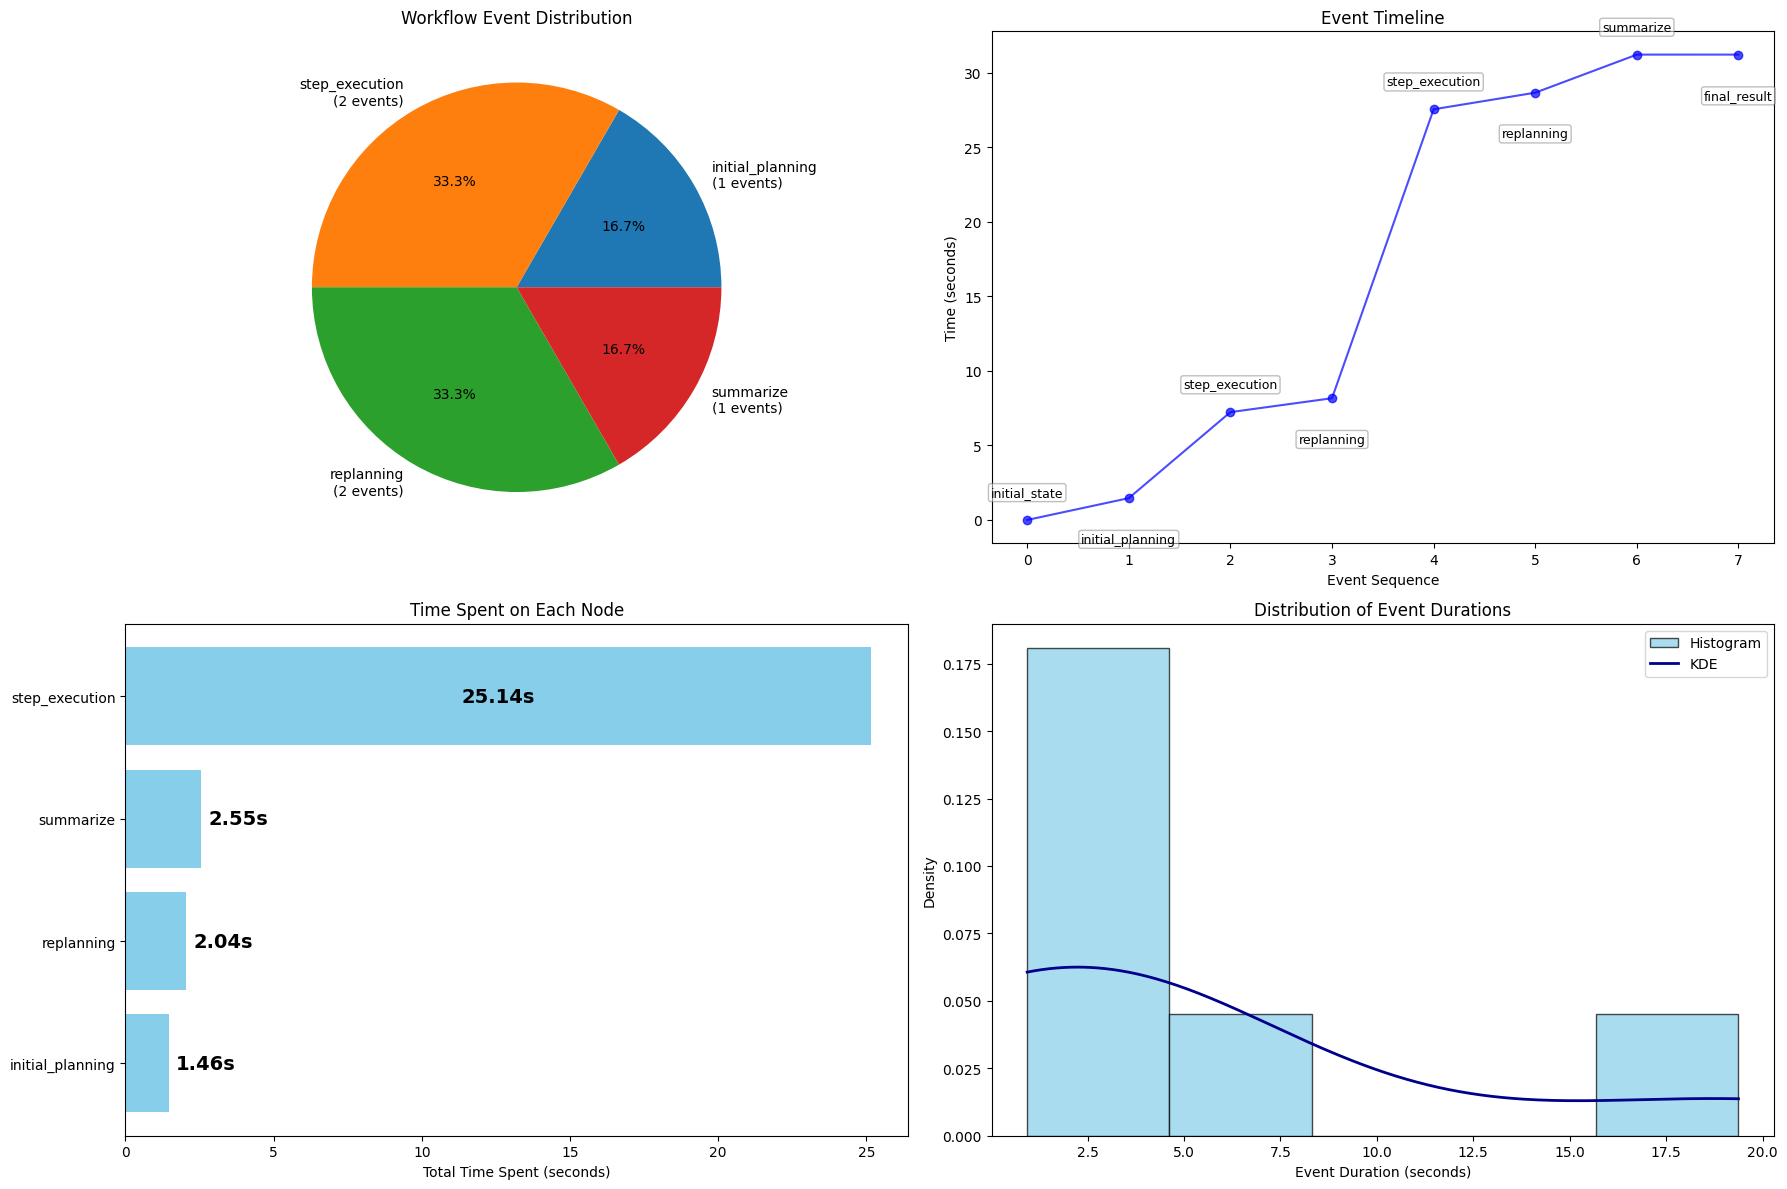

In [8]:
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

def analyze_workflow_performance(events_log, final_result):
    """Analyze workflow performance and create visualizations, including per-node timing."""

    print("📊 WORKFLOW PERFORMANCE ANALYSIS")
    print("=" * 60)

    # Event analysis
    event_counts = Counter([event['node'] for event in events_log])
    total_events = len(events_log)

    print(f"📈 Event Statistics:")
    print(f"   Total events: {total_events}")
    for node, count in event_counts.items():
        percentage = (count / total_events) * 100
        print(f"   {node}: {count} events ({percentage:.1f}%)")

    # Timing analysis
    total_duration = 0
    if len(events_log) > 1:
        start_time = events_log[0]['timestamp']
        end_time = events_log[-1]['timestamp']
        total_duration = (end_time - start_time).total_seconds()
        print(f"\n⏱️  Timing Analysis:")
        print(f"   Total workflow time: {total_duration:.2f} seconds")
        print(f"   Average time per event: {total_duration/total_events:.2f} seconds")

    # Research quality metrics
    completed_steps = []
    step_count = 0
    final_answer = None

    if isinstance(final_result, dict):
        completed_steps = final_result.get('completed_steps', [])
        step_count = final_result.get('step_count', 0)
        final_answer = final_result.get('final_answer')
    elif isinstance(final_result, str):
        final_answer = final_result

    if step_count or completed_steps or final_answer:
        print(f"\n🔍 Research Quality Metrics:")
        print(f"   Research steps completed: {step_count}")
        print(f"   Information sources used: {len(completed_steps)}")
        if final_answer:
            answer_length = len(final_answer)
            print(f"   Final answer length: {answer_length} characters")
            if completed_steps:
                total_source_chars = sum(len(str(result)) for _, result in completed_steps)
                compression_ratio = answer_length / total_source_chars if total_source_chars > 0 else 0
                print(f"   Information compression ratio: {compression_ratio:.3f}")

    # Calculate time spent on each event (delta between consecutive timestamps)
    per_event_durations = []
    for i in range(1, len(events_log) - 1):
        prev_time = events_log[i-1]['timestamp']
        curr_time = events_log[i]['timestamp']
        duration = (curr_time - prev_time).total_seconds()
        per_event_durations.append({
            'node': events_log[i]['node'],
            'duration': duration
        })
    if events_log:
        per_event_durations.insert(0, {'node': events_log[0]['node'], 'duration': 0.0})

    # Aggregate total time spent per node
    node_time_spent = defaultdict(float)
    for entry in per_event_durations:
        node_time_spent[entry['node']] += entry['duration']

    # --- Visualization with improved labels and a fourth chart ---
    try:
        # Suggestion for a fourth chart: Histogram of per-event durations (how long each event took)
        fig, axes = plt.subplots(2, 2, figsize=(18, 12))
        ax1, ax2, ax3, ax4 = axes.flatten()

        # 1. Event distribution pie chart with improved labels
        if event_counts:
            event_labels = [f"{node}\n({count} events)" for node, count in list(event_counts.items())[1:-1]]
            ax1.pie(list(event_counts.values())[1:-1], labels=event_labels, autopct='%1.1f%%', textprops={'fontsize': 10})
            ax1.set_title('Workflow Event Distribution')

        # 2. Timeline of events as a line plot
        event_times = [(event['timestamp'] - events_log[0]['timestamp']).total_seconds()
                      for event in events_log]
        event_names = [event['node'] for event in events_log]

        ax2.plot(range(len(event_times)), event_times, marker='o', color='blue', alpha=0.7)
        ax2.set_ylabel('Time (seconds)')
        ax2.set_xlabel('Event Sequence')
        ax2.set_title('Event Timeline')

        # Add event labels, staggered for readability
        for i, (seq, time, name) in enumerate(zip(range(len(event_times)), event_times, event_names)):
            y_offset = 15 if i % 2 == 0 else -25
            ax2.annotate(
                name,
                (i, time),
                xytext=(0, y_offset),
                textcoords='offset points',
                fontsize=9,
                ha='center',
                va='bottom' if y_offset > 0 else 'top',
                bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.5)
            )

        # 3. Bar chart: time spent per node in descending order
        if node_time_spent:
            # Sort nodes by total time descending
            sorted_nodes_times = sorted(node_time_spent.items(), key=lambda x: x[1], reverse=True)
            # Remove the last node if it's an artifact (as in original code)
            sorted_nodes_times = sorted_nodes_times[:-1]
            nodes = [node for node, _ in sorted_nodes_times]
            times = [t for _, t in sorted_nodes_times]
            bars = ax3.barh(nodes, times, color='skyblue')
            ax3.set_xlabel('Total Time Spent (seconds)')
            ax3.set_title('Time Spent on Each Node')
            ax3.invert_yaxis()  # Highest time at the top

            # Add value labels to bars
            for bar, t in zip(bars, times):
                width = bar.get_width()
                y = bar.get_y() + bar.get_height() / 2
                label = f"{t:.2f}s"
                # If the bar is wide enough, put label inside; else, put it just outside to the right
                if width > 0.15 * max(times):  # threshold: 15% of max bar
                    ax3.text(
                        width / 2,
                        y,
                        label,
                        va='center',
                        ha='center',
                        fontsize=14,
                        fontweight='bold',
                        color='black'
                    )
                else:
                    ax3.text(
                        width + max(times) * 0.01,  # small offset to the right
                        y,
                        label,
                        va='center',
                        ha='left',
                        fontsize=14,
                        fontweight='bold',
                        color='black'
                    )

        # 4. Histogram with KDE: Distribution of per-event durations (better for visualizing distribution shape)
        import numpy as np

        event_durations = [entry['duration'] for entry in per_event_durations if entry['duration'] > 0]
        if event_durations:
            # Histogram
            n, bins, patches = ax4.hist(
                event_durations, bins='auto', color='skyblue', alpha=0.7, edgecolor='black', density=True, label='Histogram'
            )
            # KDE (Kernel Density Estimate)
            try:
                from scipy.stats import gaussian_kde
                kde = gaussian_kde(event_durations)
                x_vals = np.linspace(min(event_durations), max(event_durations), 200)
                ax4.plot(x_vals, kde(x_vals), color='darkblue', linewidth=2, label='KDE')
            except ImportError:
                pass  # KDE not available, just show histogram

            ax4.set_xlabel('Event Duration (seconds)')
            ax4.set_ylabel('Density')
            ax4.set_title('Distribution of Event Durations')
            ax4.legend()
        else:
            ax4.text(0.5, 0.5, "No event durations to display", ha='center', va='center', fontsize=12)
            ax4.set_axis_off()

        plt.tight_layout()
        plt.savefig('deep_research_langgraph_demo_performance.png', dpi=500, bbox_inches='tight')
        plt.show()

    except Exception as e:
        print(f"⚠️ Could not create visualizations: {e}")

    return {
        'total_events': total_events,
        'event_distribution': dict(event_counts),
        'total_duration': total_duration if 'total_duration' in locals() else 0,
        'research_steps': step_count if 'step_count' in locals() else 0,
        'node_time_spent': dict(node_time_spent)
    }

# Analyze the performance
if 'events' in locals() and events:
    performance_metrics = analyze_workflow_performance(events, final_result)
else:
    print("⚠️ No events data available for analysis")


In [9]:
from pprint import pprint
from datetime import datetime

def format_event(event):
    # Format timestamp
    ts = event.get('timestamp')
    if isinstance(ts, datetime):
        ts_str = ts.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
    else:
        ts_str = str(ts)
    # Node
    node = event.get('node', '')
    # Output
    output = event.get('output', '')
    # Try to pretty print output, especially if it's a pydantic model
    if hasattr(output, 'model_dump_json'):
        output_str = output.model_dump_json(indent=2)
    elif hasattr(output, 'dict'):
        output_str = pprint(output.dict(), indent=2, compact=False, width=120)
    else:
        output_str = pprint(output, indent=2, compact=False, width=120)
    # Compose
    print(f"--- Event ---")
    print(f"Timestamp: {ts_str}")
    print(f"Node: {node}")
    print(f"Output:")
    if hasattr(output, 'model_dump_json'):
        print(output.model_dump_json(indent=2))
    else:
        pprint(output, indent=2, compact=False, width=120)
    print("")

for i, event in enumerate(events):
    format_event(event)

--- Event ---
Timestamp: 2025-07-11 10:39:13.172
Node: initial_state
Output:
{
  "objective": "Who is the current mayor of the city with the oldest Chinatown in America? Also find their birthday",
  "current_plan": null,
  "completed_steps": [],
  "current_step": null,
  "step_result": null,
  "step_count": 0,
  "max_steps": 10,
  "ready_to_summarize": false,
  "initial_response": null,
  "final_answer": null,
  "is_complete": false,
  "messages": [],
  "error_message": null
}

{ 'current_plan': Plan(steps=['Identify which city in America has the oldest Chinatown.', 'Confirm the current mayor of that city using official or reputable sources.', "Find the mayor's date of birth from reliable sources."]),
  'messages': [AIMessage(content='Created research plan with 3 steps.', additional_kwargs={}, response_metadata={})]}
--- Event ---
Timestamp: 2025-07-11 10:39:14.636
Node: initial_planning
Output:
{ 'current_plan': Plan(steps=['Identify which city in America has the oldest Chinatown.', '